In [25]:
# Import libraries 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [26]:
# load dataframes
df_deuda = pd.read_csv('../data/deuda.csv', sep=',')

In [27]:
df_deuda.head(5)

,Unidad,Saldo pendiente,Semilla,Total Deuda,Estado
0,8A,0.0,0.0,0.0,Pendiente
1,8B,0.0,700.0,700.0,Pendiente
2,8C,0.0,0.0,0.0,Pagado
3,8D,0.0,0.0,0.0,Pagado
4,8E,0.0,0.0,0.0,Pagado


Porcentaje de unidades con deuda superior a $1000: 15.54%
Porcentaje de unidades sin deuda: 66.22%
Porcentaje de unidades con deuda entre $1 y $1000: 18.24%


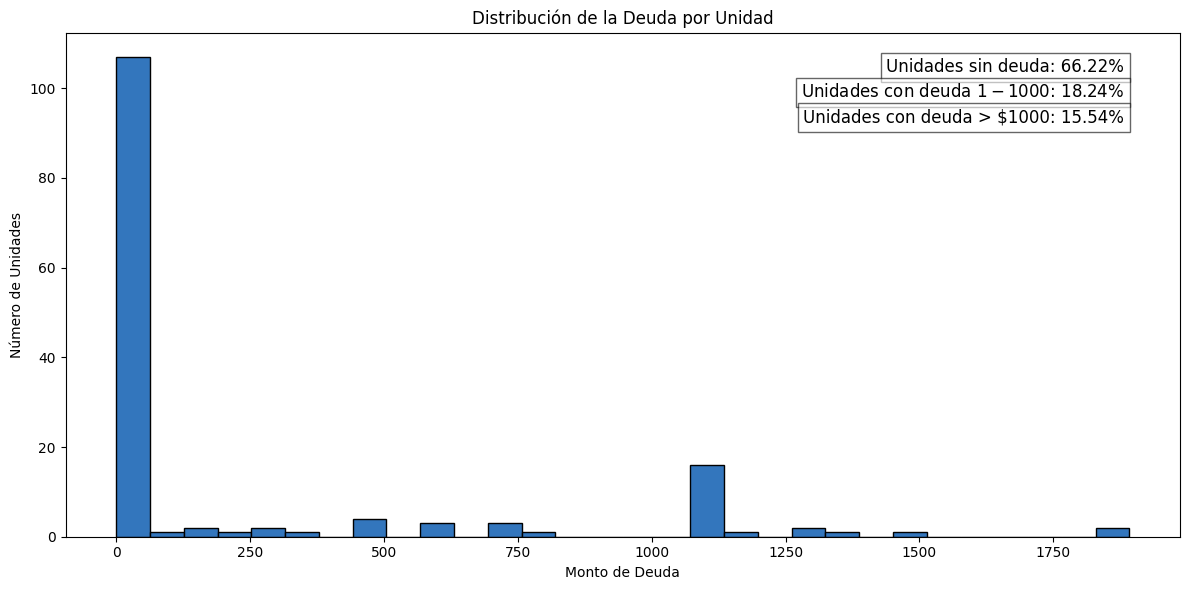

In [28]:

total_unidades = len(df_deuda)
unidades_con_deuda_mayor_1000 = df_deuda[df_deuda['Total Deuda'] > 1000].shape[0]
porcentaje_con_deuda_mayor_1000 = (unidades_con_deuda_mayor_1000 / total_unidades) * 100

unidades_sin_deuda = df_deuda[df_deuda['Total Deuda'] == 0].shape[0]
porcentaje_sin_deuda = (unidades_sin_deuda / total_unidades) * 100

unidades_con_deuda_1_1000 = df_deuda[(df_deuda['Total Deuda'] > 0) & (df_deuda['Total Deuda'] <= 1000)].shape[0]
porcentaje_con_deuda_1_1000 = (unidades_con_deuda_1_1000 / total_unidades) * 100

print(f"Porcentaje de unidades con deuda superior a $1000: {porcentaje_con_deuda_mayor_1000:.2f}%")
print(f"Porcentaje de unidades sin deuda: {porcentaje_sin_deuda:.2f}%")
print(f"Porcentaje de unidades con deuda entre $1 y $1000: {porcentaje_con_deuda_1_1000:.2f}%")

plt.figure(figsize=(12, 6))
plt.hist(df_deuda['Total Deuda'], bins=30, color='#3376BD', edgecolor='black')
plt.title('Distribución de la Deuda por Unidad')
plt.xlabel('Monto de Deuda')
plt.ylabel('Número de Unidades')

plt.text(0.95, 0.95, f'Unidades sin deuda: {porcentaje_sin_deuda:.2f}%', 
         transform=plt.gca().transAxes, fontsize=12, verticalalignment='top', horizontalalignment='right', bbox=dict(facecolor='white', alpha=0.6))
plt.text(0.95, 0.90, f'Unidades con deuda $1-$1000: {porcentaje_con_deuda_1_1000:.2f}%', 
         transform=plt.gca().transAxes, fontsize=12, verticalalignment='top', horizontalalignment='right', bbox=dict(facecolor='white', alpha=0.6))
plt.text(0.95, 0.85, f'Unidades con deuda > $1000: {porcentaje_con_deuda_mayor_1000:.2f}%', 
         transform=plt.gca().transAxes, fontsize=12, verticalalignment='top', horizontalalignment='right', bbox=dict(facecolor='white', alpha=0.6))

plt.tight_layout()
plt.show()

Monto total de la deuda en la columna 'semilla': $30742.55
Monto total de la deuda en la columna 'saldo pendiente': $5692.77
Monto total de la deuda: $36435.32


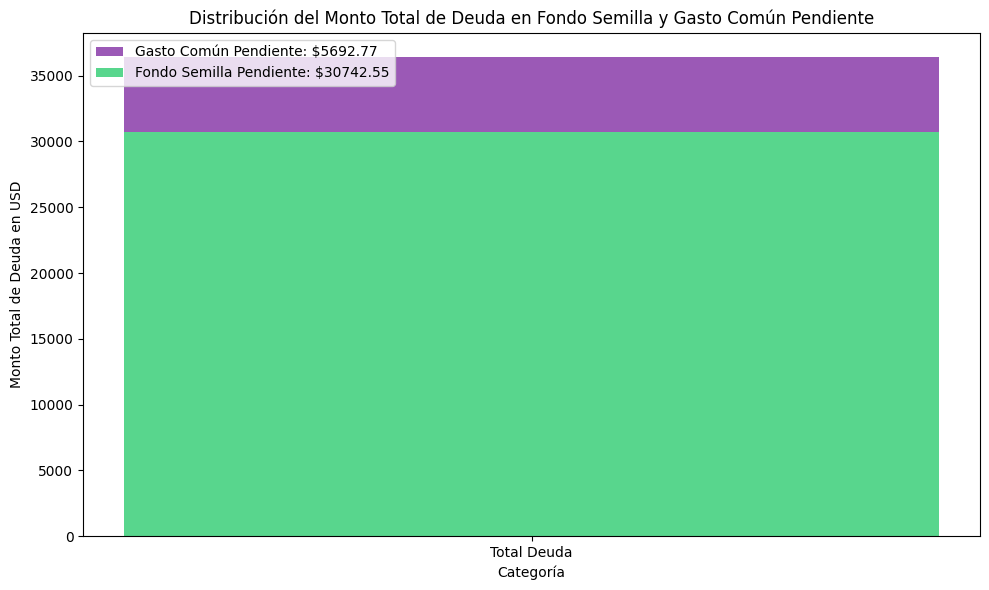

In [29]:

df_deuda.columns = df_deuda.columns.str.lower()

monto_total_semilla = df_deuda['semilla'].sum()

monto_total_saldo_pendiente = df_deuda['saldo pendiente'].sum()

monto_total_deuda = monto_total_semilla + monto_total_saldo_pendiente

print(f"Monto total de la deuda en la columna 'semilla': ${monto_total_semilla:.2f}")
print(f"Monto total de la deuda en la columna 'saldo pendiente': ${monto_total_saldo_pendiente:.2f}")
print(f"Monto total de la deuda: ${monto_total_deuda:.2f}")

fig, ax = plt.subplots(figsize=(10, 6))

categories = ['Total Deuda']
semilla_values = [monto_total_semilla]
saldo_pendiente_values = [monto_total_saldo_pendiente]

bar1 = plt.bar(categories, saldo_pendiente_values, bottom=semilla_values, label=f'Gasto Común Pendiente: ${monto_total_saldo_pendiente:.2f}', color='#9B59B6')
bar2 = plt.bar(categories, semilla_values, label=f'Fondo Semilla Pendiente: ${monto_total_semilla:.2f}', color='#58D68D')

plt.xlabel('Categoría')
plt.ylabel('Monto Total de Deuda en USD')
plt.title('Distribución del Monto Total de Deuda en Fondo Semilla y Gasto Común Pendiente')
plt.legend(loc='upper left')

plt.tight_layout()
plt.show()
